<a href="https://colab.research.google.com/github/Guilhermebit/movie-suggestions-using-k-nearest-neighbors/blob/main/KNN_Machine_Learning_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

plt.style.use('default')  # Define o estilo padrão (fundo branco)

# Importando o Dataset de Filmes

In [ ]:
# movieId: identificação única de cada filme.
# title: O título de cada filme, junto com o ano de lançamento.
# genres: O gênero, ou conjunto de gêneros, de cada filme.

# Lendo o dataset de filmes
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# Transforma a coluna movieId em índice
movies.set_index('movieId', inplace=True)
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


# Importando o Dataset de Avaliações

In [ ]:
# userId: identificação única de casa usuário
# movieId: identificação única de cada filme
# rating: avaliação de um usuário sobre um filme específico
# timestamp: representam os segundos que se passaram desde a meia-noite(UTC) do dia 1º de Janeiro de 1970

# Lendo o dataset de avaliações dos usuários
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
# Transforma a coluna userId em índice
ratings.set_index('userId', inplace=True)
ratings

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
...,...,...,...
610,166534,4.0,1493848402
610,168248,5.0,1493850091
610,168250,5.0,1494273047


In [ ]:
# Informações a respeito das avaliações informadas pelos usuários
ratings.rating.describe().round(2)

# count -> número total de avaliações registradas
# mean -> média das avaliações
# std -> desvio padrão
# min -> o menor valor de nota
# 25% -> primeiro quartil
# 50% -> a mediana
# 75% -> o terceiro quartil
# max -> o maior valor de nota

,rating
count,100836.00
mean,3.50
std,1.04
min,0.50
25%,3.00
50%,3.50
75%,4.00
max,5.00


In [ ]:
# total de usuários contidos no dataset
ratings.index.nunique()

610

In [ ]:
# número de avaliações
movies['number_of_ratings'] = ratings['movieId'].value_counts()

# média de avaliações
movies['average_ratings'] = ratings.groupby('movieId')['rating'].mean().round(2)

movies

,title,genres,number_of_ratings,average_ratings
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.92
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.43
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.26
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.36
5,Father of the Bride Part II (1995),Comedy,49.0,3.07
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0,4.00
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0,3.50
193585,Flint (2017),Drama,1.0,3.50


In [ ]:
# filmes mais avaliados
movies.sort_values('number_of_ratings', ascending=False).head(10)

,title,genres,number_of_ratings,average_ratings
movieId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.16
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.20
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.16
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.19
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.23
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.75
110,Braveheart (1995),Action|Drama|War,237.0,4.03
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.97


In [ ]:
# Filmes mais bem avaliados
# Define um número mínimo de avaliações de 100
movies.query('number_of_ratings >= 100').sort_values('average_ratings', ascending=False).head(10)

,title,genres,number_of_ratings,average_ratings
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
858,"Godfather, The (1972)",Crime|Drama,192.0,4.29
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.27
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.26
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.25
1213,Goodfellas (1990),Crime|Drama,126.0,4.25
912,Casablanca (1942),Drama|Romance,100.0,4.24
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.24
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204.0,4.24


# Funções para Cálculos

In [ ]:
# Esta é a fórmula da distância euclidiana: sqrt((x2 - x1)^2 + (y2 - y1)^2)
# Ela é definida como a soma da raiz quadrada da diferença entre x e y em suas respectivas dimensões
def euclidian_distance(a, b):
    return round(np.linalg.norm(a - b), 2)

In [ ]:
# Recupera as avaliações de um usuário
def user_ratings(user_id):
  user_ratings = ratings.query('userId == %d' % user_id)[['movieId', 'rating']].set_index('movieId')
  return user_ratings

user_ratings(1)

,rating
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [ ]:
# Recupera as coordenadas de um usuário
def get_user_coordinates(user_id):
  x = round(np.mean(user_ratings(user_id)), 2) # Coordenada X (média das avaliações)
  y = round(np.std(user_ratings(user_id)).values[0], 2) # Coordenada Y (desvio padrão das avaliações)

  return x, y


# Extrai as avaliações de dois userId informados, une em um mesmo dataframe e calcula a distância euclidiana entre eles
# minimun - é a quantidade mínima de filmes avaliados entre usuários diferentes
def distance_between_two(userId_1, userId_2, minimum = 5):
  user_1 = user_ratings(userId_1)
  user_2 = user_ratings(userId_2)

  join_df = user_1.join(user_2, lsuffix='_user1', rsuffix='_user2').dropna()

  if(len(join_df) < minimum):
    return None

  distance_users = euclidian_distance(join_df.rating_user1, join_df.rating_user2)
  return distance_users
  #return print(f'A distância entre o usuário {userId_1} e {userId_2} é {distance_users}')


#Calcula a distância de diversos usuários
# O parâmetro users_to_verify é para o caso de querer filtrar uma quantidade específica ao invés de todos os usuários
# Se users_to_verify = 30, somente os 30 primeiros usuários serão verificados
def distance_from_all_users(informed_user, users_to_verify=None):
  all_users = ratings.index.unique() # Obtém todos os usuários únicos

  if(users_to_verify):
    all_users = all_users[:users_to_verify] # limita o número de usuários a verificar

  distance_all_users = []

  for user_id in all_users:
    if user_id != informed_user: # Evita calcular a distância do usuário com ele mesmo
      distance = distance_between_two(informed_user, user_id)
      if distance is not None:
        distance_all_users.append((informed_user, user_id, distance))

  # Converte para Dataframe
  distance_all_users = pd.DataFrame(distance_all_users, columns=['informed_user', 'other', 'distance'])

  return distance_all_users


# Calcula a distânca dos K-vizinhos mais próximos
# informed_user → O ID do usuário para quem o algoritmo está recomendando os filmes.
# k_nearest_neighbors → Número de vizinhos mais próximos a serem considerados.
# users_to_verify=None → Número de usuários a serem considerados no cálculo.
def knn_algorithm(informed_user, k_nearest_neighbors = 10, users_to_verify = None):
  distance_users = distance_from_all_users(informed_user, users_to_verify=users_to_verify)
  distance_users = distance_users.sort_values('distance')

  return distance_users.head(k_nearest_neighbors)


# Função para sugerir filmes
def suggest_movies_to_user(informed_user, k_nearest_neighbors = 10, users_to_verify = None):
  informed_user_ratings = user_ratings(informed_user)
  movies_seen_by_user = informed_user_ratings.index

  similar_neighbors = knn_algorithm(informed_user, k_nearest_neighbors = k_nearest_neighbors, users_to_verify=users_to_verify)
  similar = similar_neighbors.index
  similar_user_ratings = ratings.loc[similar]
  recommendations = round(similar_user_ratings.groupby('movieId').mean()[['rating']], 2)
  frequency = similar_user_ratings.groupby('movieId').count()[['rating']]


  # recomenda apenas os filmes avaliados pela metade dos k-vizinhos mais próximos
  minimum_movie_filter = k_nearest_neighbors / 2
  recommendations = recommendations.join(frequency, lsuffix='_mean_others', rsuffix="_frequency_others")
  recommendations = recommendations.query('rating_frequency_others >= %.2f' % minimum_movie_filter)
  recommendations = recommendations.sort_values('rating_mean_others', ascending=False)
  recommendations = recommendations.drop(movies_seen_by_user, errors='ignore')

  return recommendations.join(movies)


Verificando a distância euclidiana entre dois usuários

In [ ]:
dist = distance_between_two (1, 4)
print(f'A distância entre o usuário 1 e 4 é {distance_between_two (1, 4):.2f}')

A distância entre o usuário 1 e 4 é 11.14


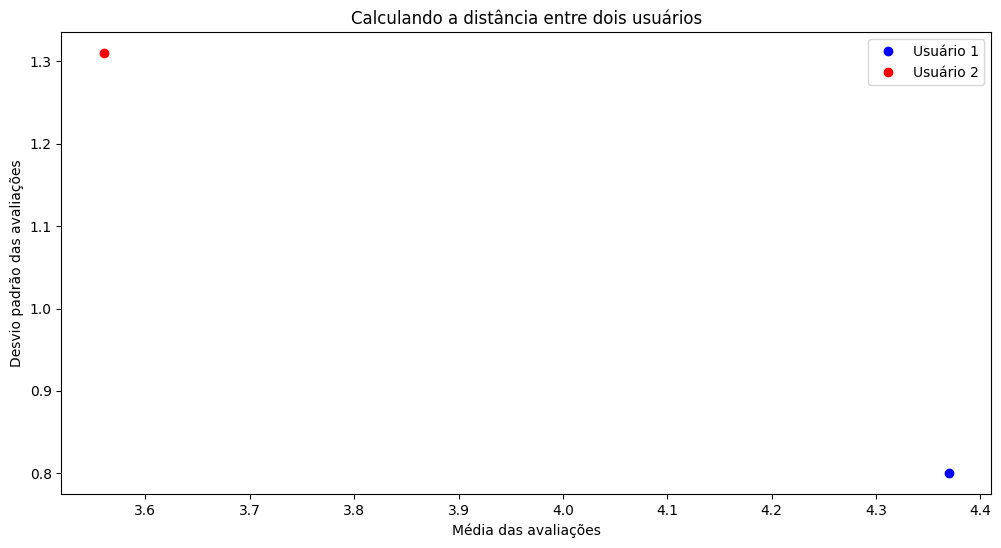

In [ ]:
x1, y1 = get_user_coordinates(1) # userId == 1
x2, y2 = get_user_coordinates(4) # UserId == 4

#print(f'Coordenadas do usuário 1: ({x1}, {y1})')
#print(f'Coordenadas do usuário 2: ({x2}, {y2})')

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando os usuários com cores diferentes
plt.plot(x1, y1, "bo")  # Usuário 1 - Azul
plt.plot(x2, y2, "ro")  # Usuário 2 - Vermelho

# Adicionando a legenda
plt.legend(['Usuário 1', 'Usuário 2'])

# Configurações do gráfico
plt.title("Calculando a distância entre dois usuários")
plt.xlabel("Média das avaliações")
plt.ylabel("Desvio padrão das avaliações")

# Exibir gráfico
plt.show()

Vizinhos mais próximos calculados pelo algoritmo

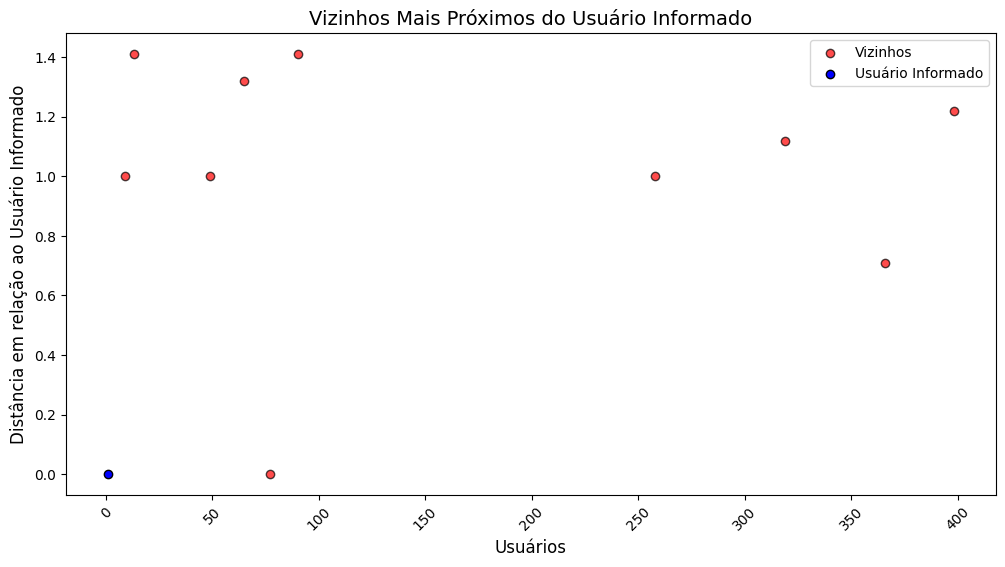

In [ ]:
# Obtendo os vizinhos mais próximos
neighbors = knn_algorithm(1, 10, 500)
#print(f'Distância dos vizinhos mais próximos:\n{neighbors}')

plt.figure(figsize=(12, 6))

# Plotando os vizinhos mais próximos (em vermelho)
plt.scatter(neighbors['other'], neighbors['distance'], color='red', alpha=0.7, edgecolors='black', label='Vizinhos')

# Adicionando o usuário informado no gráfico (em azul)
plt.scatter([1], [0], color='blue', edgecolors='black', label='Usuário Informado')

# Ajustando rótulos e layout
plt.xlabel("Usuários", fontsize=12)
plt.ylabel("Distância em relação ao Usuário Informado", fontsize=12)
plt.title(f"Vizinhos Mais Próximos do Usuário Informado", fontsize=14)
plt.legend()
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

No gráfico acima podemos notar que quanto menor a distância, mais semelhantes são os usuários em termos de avaliações de filmes.

# Filmes Sugeridos

In [ ]:
most_recommended_movies = suggest_movies_to_user(1, users_to_verify=500).head(10)

No exemplo analisado, ao considerar 500 usuários e encontrar os 10 vizinhos mais similares ao usuário (informed_user), os 10 filmes recomendados (que ele ainda não viu) são:

In [ ]:
most_recommended_movies

,rating_mean_others,rating_frequency_others,title,genres,number_of_ratings,average_ratings
movieId,,,,,,
318,4.5,5,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
858,4.5,5,"Godfather, The (1972)",Crime|Drama,192.0,4.29
165,4.2,5,Die Hard: With a Vengeance (1995),Action|Crime|Thriller,144.0,3.56
1527,4.0,5,"Fifth Element, The (1997)",Action|Adventure|Comedy|Sci-Fi,116.0,3.75
150,4.0,5,Apollo 13 (1995),Adventure|Drama|IMAX,201.0,3.85
5218,3.8,5,Ice Age (2002),Adventure|Animation|Children|Comedy,85.0,3.69
1036,3.8,5,Die Hard (1988),Action|Crime|Thriller,145.0,3.86
1101,3.7,5,Top Gun (1986),Action|Romance,83.0,3.30
5349,3.7,5,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.54


# Conclusão



A função **suggest_movies_to_user** recebe o **ID do usuário** (informed_user), para quem queremos recomendar filmes, além de dois parâmetros principais:

**k_nearest_neighbors**: o número de **vizinhos mais próximos** a serem considerados, definido como 10 neste caso.

**users_to_verify**: a **quantidade de usuários** que entram na verificação. Se este valor for **None**, a função verifica **todo o dataset**.

Além disso, são adicionadas duas colunas importantes ao processo de recomendação:

**rating_mean_others**: a média de avaliações dos k vizinhos mais próximos.

**rating_frequency_others**: a quantidade de usuários (dentre os k vizinhos) que avaliaram determinado filme.

Para que um filme seja recomendado, ele deve ter sido avaliado **por pelo menos** metade dos k vizinhos mais próximos.

A seguir, apresento o gráfico com os Top 10 filmes recomendados para o usuário analisado.

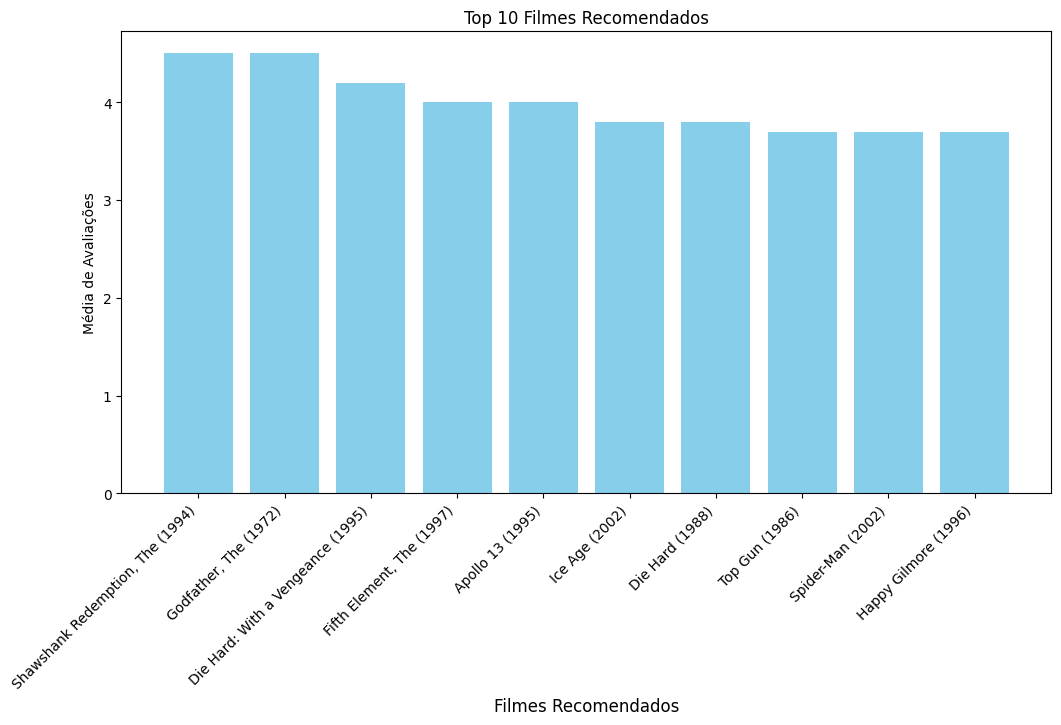

In [ ]:
# Gráfico dos filmes recomendados
plt.figure(figsize=(12, 6))
plt.bar(most_recommended_movies['title'], most_recommended_movies['rating_mean_others'], color='skyblue')
plt.xlabel('Filmes Recomendados', fontsize=12)
plt.ylabel('Média de Avaliações')
plt.title('Top 10 Filmes Recomendados')

plt.xticks(rotation=45, ha='right')

plt.show()

Salva a lista de filmes em um arquivo de texto

In [ ]:
df = pd.DataFrame(most_recommended_movies['title'])
df.to_csv('most_recommended_movies.txt', index=False, header=False, sep='\n')